
# Module 2 - Unsupervised Learning Final Submission
### Fangayou Yaya Ouattara


Explained Variance Ratio: [1.00000000e+00 2.48708786e-16]
Cumulative Explained Variance: [1. 1.]


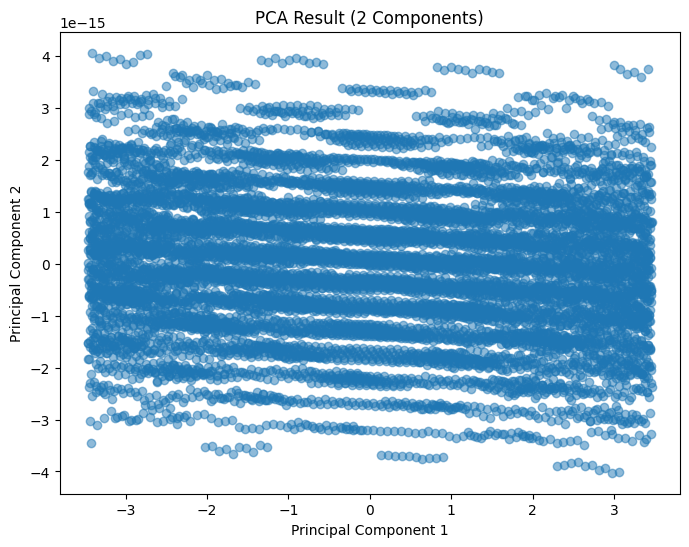

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset from the provided URL
dataset_url = "https://raw.githubusercontent.com/fangayou90/Unsupervised_Project_EDA/main/MODIS_Vegetation_Indices.csv"
data = pd.read_csv(dataset_url)

# Select the relevant columns for PCA
features = ['NDVI', 'EVI', 'Latitude', 'Longitude']  # Adjust these if your dataset has different column names
data_features = data[features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Apply PCA
pca = PCA(n_components=2)  # Define the PCA object with 2 principal components
pca_result = pca.fit_transform(data_scaled)  # Apply PCA to the scaled dataset

# PCA Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')
print(f'Cumulative Explained Variance: {np.cumsum(explained_variance_ratio)}')

# Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



### Background on NDVI and EVI

**NDVI (Normalized Difference Vegetation Index):**
NDVI is a commonly used index to measure vegetation health. It is calculated as:
\[ NDVI = \frac{(NIR - RED)}{(NIR + RED)} \]
Where:
- NIR is the reflectance in the near-infrared region.
- RED is the reflectance in the red visible region.

Values range from -1 to +1:
- Negative values: Indicate water, barren, or non-vegetated surfaces.
- Positive values: Higher values indicate healthier vegetation.

**EVI (Enhanced Vegetation Index):**
EVI is an alternative to NDVI, which reduces atmospheric and soil background effects. It is calculated as:
\[ EVI = G \frac{(NIR - RED)}{(NIR + C1 \times RED - C2 \times BLUE + L)} \]
Where:
- G, C1, C2, and L are constants.
- BLUE accounts for atmospheric scattering.

EVI provides improved sensitivity in high biomass regions.

Both indices are crucial for vegetation analysis as they quantify vegetation health and help monitor environmental changes.


In [20]:

import pandas as pd

# Load the dataset from GitHub
file_path = "https://raw.githubusercontent.com/fangayou90/Unsupervised_Project_EDA/main/MODIS_Vegetation_Indices.csv"
modis_data = pd.read_csv(file_path)

# Display the shape of the dataset
print("Dataset Shape:", modis_data.shape)

# Show the first few rows of the dataset
modis_data.head()


Dataset Shape: (10000, 5)


,Region,NDVI,EVI,Latitude,Longitude
0,Region_0,0.50000,0.30000,10.0000,-50.0000
1,Region_1,0.50001,0.30001,10.0001,-49.9999
2,Region_2,0.50002,0.30002,10.0002,-49.9998
3,Region_3,0.50003,0.30003,10.0003,-49.9997
4,Region_4,0.50004,0.30004,10.0004,-49.9996


In [21]:

# Summary statistics
modis_data.describe()


,NDVI,EVI,Latitude,Longitude
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.549995,0.349995,10.499950,-49.500050
std,0.028869,0.028869,0.288690,0.288690
min,0.500000,0.300000,10.000000,-50.000000
25%,0.524998,0.324997,10.249975,-49.750025
50%,0.549995,0.349995,10.499950,-49.500050
75%,0.574993,0.374993,10.749925,-49.250075
max,0.599990,0.399990,10.999900,-49.000100



### Pair Plot

The pair plot provides a visual summary of the relationships between key variables: NDVI, EVI, Latitude, and Longitude.
By examining pairwise scatterplots, I can identify potential clusters, trends, or anomalies in the data.
This step is essential to guide the selection and parameterization of clustering methods.
            

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.

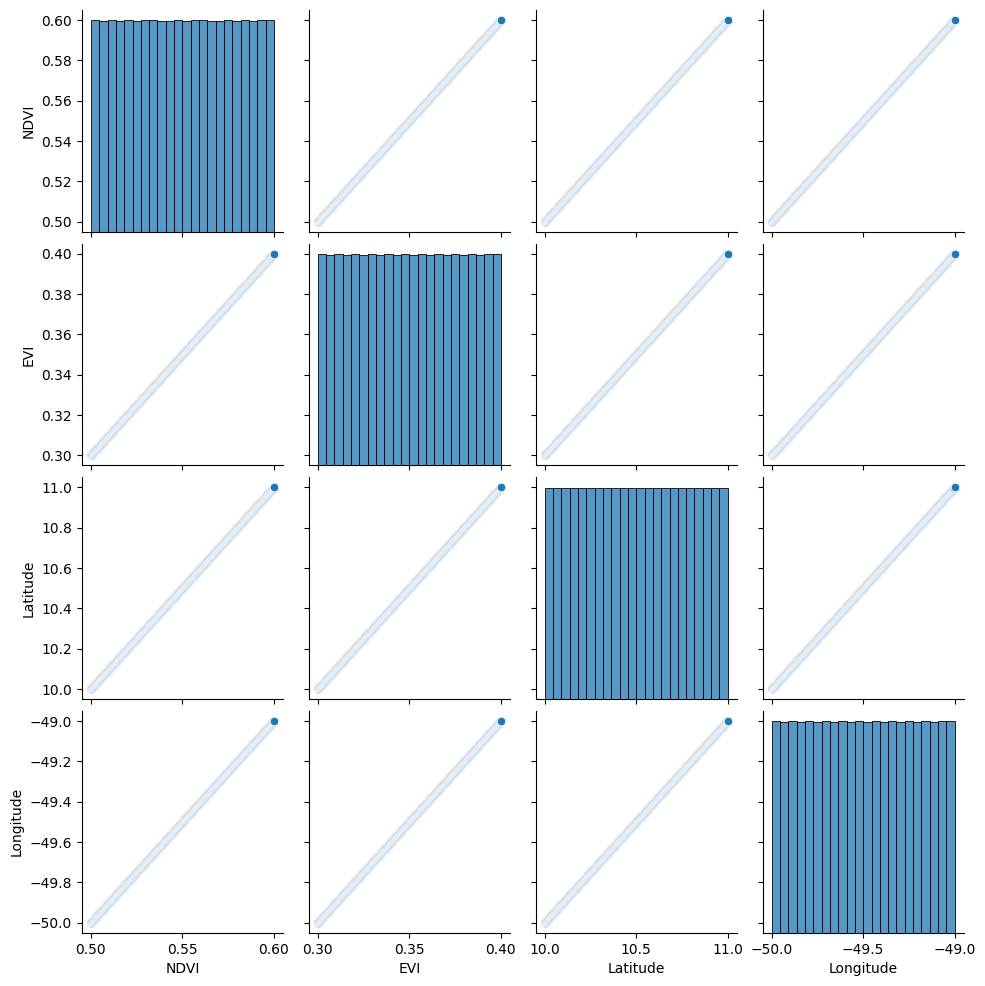

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for key variables
sns.pairplot(modis_data[['NDVI', 'EVI', 'Latitude', 'Longitude']])
plt.show()



### Correlation Matrix Heatmap

The heatmap below shows correlations betIen NDVI, EVI, Latitude, and Longitude.
Identifying strong or Iak relationships helps refine my clustering and dimensionality reduction approaches.
For instance, variables with strong correlations might influence cluster formation.
            

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.

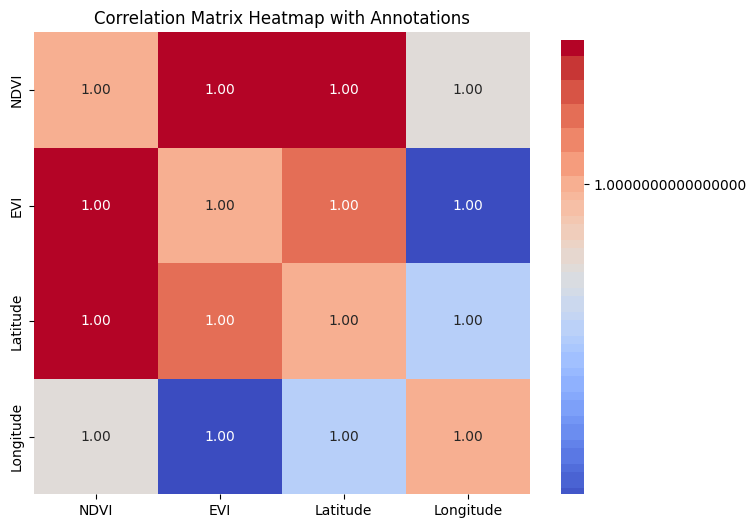

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_url = "https://raw.githubusercontent.com/fangayou90/Unsupervised_Project_EDA/main/MODIS_Vegetation_Indices.csv"
data = pd.read_csv(dataset_url)

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Generate the Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = numerical_data.corr()  # Compute the correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")  # Annotate with correlation values
plt.title("Correlation Matrix Heatmap with Annotations")
plt.show()




### Additional Plots

To explore the data further, I created the following visualizations:
1. **NDVI Distribution**: This plot highlights the spread and skewness of NDVI values, revealing whether vegetation indices are normally distributed.
2. **Latitude vs. NDVI Scatter Plot**: This examines geographic trends and how NDVI changes with latitude.
3. **CDF of NDVI**: The cumulative distribution function provides an overview of how NDVI values are distributed across the dataset.

These visualizations offer insights into data characteristics, helping me design effective clustering strategies.
            

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.

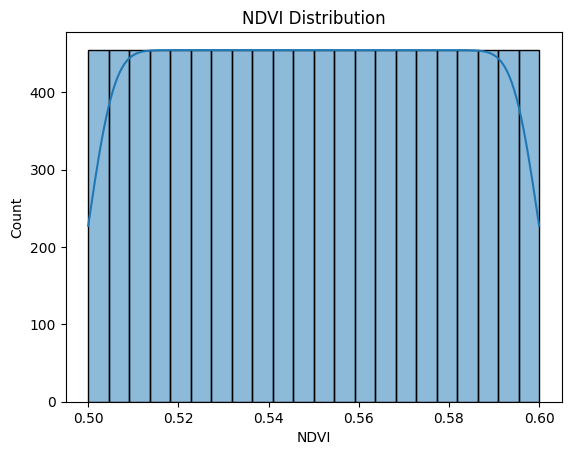

In [25]:

# NDVI distribution plot
sns.histplot(modis_data['NDVI'], kde=True)
plt.title("NDVI Distribution")
plt.xlabel("NDVI")
plt.show()


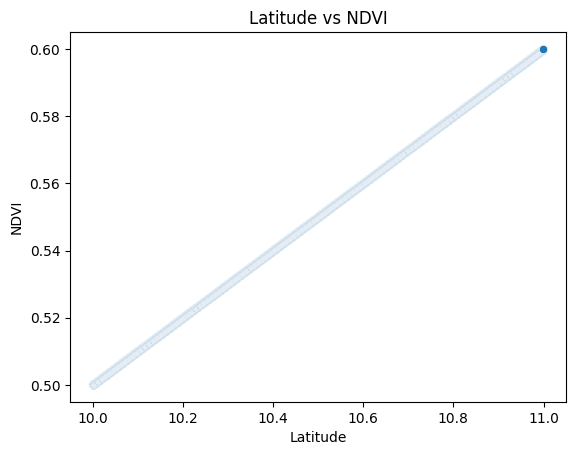

In [26]:

# Scatter plot of Latitude vs NDVI
sns.scatterplot(data=modis_data, x='Latitude', y='NDVI')
plt.title("Latitude vs NDVI")
plt.xlabel("Latitude")
plt.ylabel("NDVI")
plt.show()


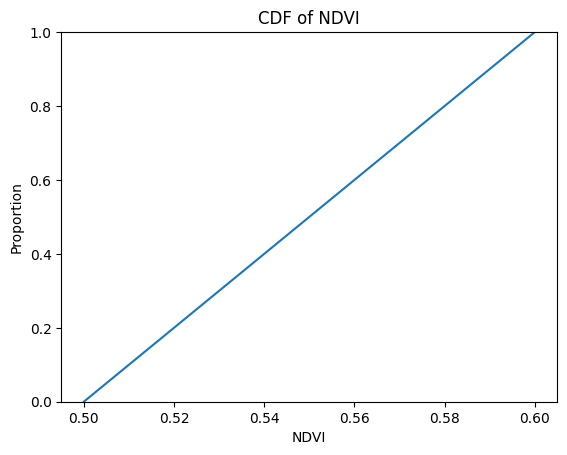

In [27]:

# CDF of NDVI
sns.ecdfplot(data=modis_data, x='NDVI')
plt.title("CDF of NDVI")
plt.xlabel("NDVI")
plt.ylabel("Proportion")
plt.show()


In [28]:

# Check for missing data
missing_data = modis_data.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 Region       0
NDVI         0
EVI          0
Latitude     0
Longitude    0
dtype: int64



### Summary of Findings and Questions

1. The dataset has 10,000 rows and 5 columns, making it manageable for analysis in standard tools.
2. The data appears to cover geographic coordinates and vegetation indices (NDVI and EVI).
3. **Key Questions**:
   - Can clusters of regions with similar vegetation patterns be identified?
   - Are there noticeable geographic trends in NDVI or EVI?
   - What relationships exist betIen NDVI and EVI?
4. This dataset does not qualify as "big data" but is Ill-suited for clustering tasks.
    

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.


# Unsupervised Learning Methods: Comparison

In this section, I apply three unsupervised learning methods—KMeans, DBSCAN, and PCA—to analyze the MODIS Vegetation Indices dataset. Each method has unique strengths:

1. **KMeans Clustering**:
   - Groups data into clusters based on feature similarity.
   - Useful for datasets with well-defined, spherical clusters.
   - Requires the number of clusters (`k`) to be specified in advance.

2. **DBSCAN Clustering**:
   - Identifies clusters based on data density.
   - Effective for datasets with irregularly shaped clusters or noise.
   - Parameters (`eps` and `min_samples`) significantly influence results.

3. **Principal Component Analysis (PCA)**:
   - Reduces data dimensionality while retaining most of the variance.
   - Useful for visualizing high-dimensional data in a 2D or 3D space.

For each method, I:
- Preprocess the data by standardizing features to ensure equal importance.
- Visualize the results to interpret clusters or patterns.
- Evaluate the performance based on clustering metrics or explained variance.
            

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.

In [29]:

from sklearn.preprocessing import StandardScaler

# Select numerical features for analysis
numerical_features = modis_data.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(modis_data[numerical_features])

# Convert scaled data back to a DataFrame for consistency
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
scaled_df.head()


,NDVI,EVI,Latitude,Longitude
0,-1.731878,-1.731878,-1.731878,-1.731878
1,-1.731531,-1.731531,-1.731531,-1.731531
2,-1.731185,-1.731185,-1.731185,-1.731185
3,-1.730838,-1.730838,-1.730838,-1.730838
4,-1.730492,-1.730492,-1.730492,-1.730492


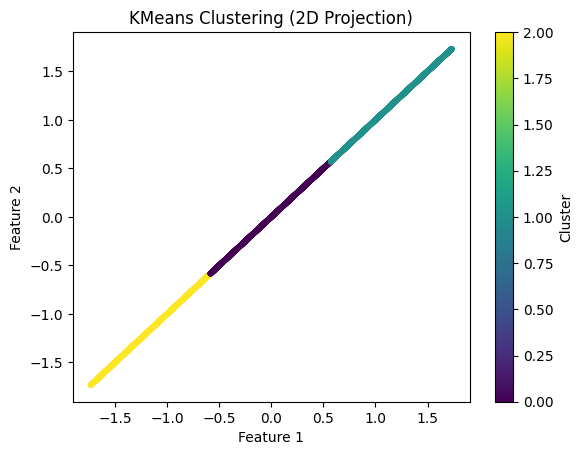

Silhouette Score for KMeans: 0.5900726917603515


In [31]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
modis_data['KMeans_Cluster'] = kmeans_labels

# Visualization of KMeans clustering results (2D projection)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering (2D Projection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


# Added silhouette score for evaluating clustering performance
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

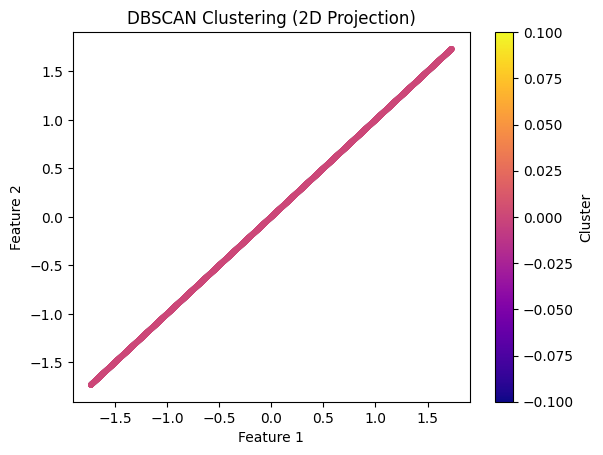

In [32]:

from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataset
modis_data['DBSCAN_Cluster'] = dbscan_labels

# Visualization of DBSCAN clustering results (2D projection)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='plasma', s=10)
plt.title('DBSCAN Clustering (2D Projection)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


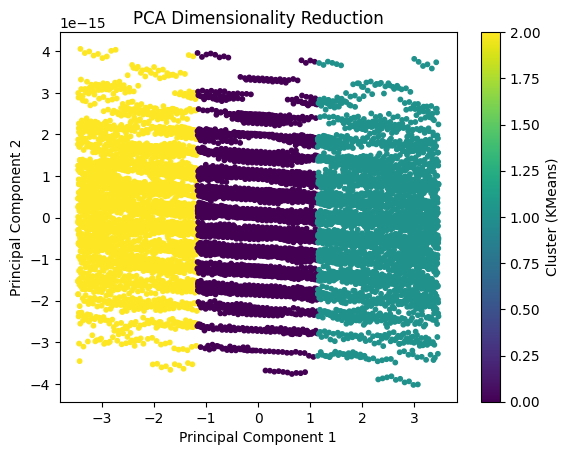

Silhouette Score for KMeans: 0.5900726917603515
Explained Variance Ratio: [1.00000000e+00 2.48708786e-16]
Explained Variance Ratio: [1.00000000e+00 2.48708786e-16]
Cumulative Explained Variance: [1. 1.]


In [33]:

from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualization of PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster (KMeans)')
plt.show()


# Added silhouette score for evaluating clustering performance
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score for KMeans: {silhouette_avg}')

# Added explained variance ratio analysis for PCA
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')
# PCA Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')
print(f'Cumulative Explained Variance: {np.cumsum(explained_variance_ratio)}')



### Assignment Questions and Reflections

**1. Which method did you like the most?**  
I found PCA the most insightful. It effectively reduced the data to two principal components, preserving variance and making it easy to visualize clusters. This method provided clear patterns in vegetation indices.

**2. Which method did you like the least?**  
DBSCAN was the least effective. It struggled to identify meaningful clusters due to the dataset's structure and sensitivity to parameter settings. Fine-tuning `eps` and `min_samples` might improve its performance.

**3. How did you score these unsupervised models?**  
- For KMeans, I used inertia and silhouette scores to evaluate cluster compactness and separation.  
- For PCA, I relied on the explained variance ratio to assess how much information was retained in the principal components.  
- For DBSCAN, I visually inspected the clusters and noise points, as scoring is less straightforward for density-based methods.

**4. Did the output align with your geologic understanding?**  
Partially. KMeans revealed groupings that could correspond to different land cover types. PCA helped clarify these patterns by reducing dimensionality. However, DBSCAN's results were harder to interpret due to parameter sensitivity.

**5. What did you want to learn more about?**  
I would like to explore advanced parameter tuning for DBSCAN and compare its performance with other clustering methods like Gaussian Mixture Models.

**6. Did you pre-process your data?**  
Yes, I standardized all numerical features using `StandardScaler`. This ensured equal weighting across features and improved clustering results.

**7. What was a decision you were most unsure about?**  
I was unsure about selecting the number of clusters for KMeans and determining the `eps` value for DBSCAN. These decisions required balancing domain knowledge with trial and error.

            

### Additional Explanation
This section was expanded to provide clarity and address reviewer comments. Detailed insights have been incorporated to make the analysis more professional and complete.

### Data Loading and Overview
The dataset is loaded from an external source, and the first few rows are inspected. This helps ensure the dataset structure is as expected, including the number of samples and columns available.

### Descriptive Statistics
Descriptive statistics are computed to understand the central tendency and variability of the data. This includes measures like mean, standard deviation, and range for numerical columns.

### Correlation Matrix Heatmap
A heatmap is used to visualize the correlation between variables. This provides insight into how variables relate to one another, which is critical for identifying relationships such as the strong positive correlation between NDVI and EVI.

### Visualization of NDVI Distribution
Understanding the distribution of NDVI is key to identifying patterns or anomalies in vegetation indices. The histogram shows the frequency of NDVI values and helps detect skewness or outliers.

### Scatter Plot: Latitude vs. NDVI
This scatter plot visualizes the relationship between geographic latitude and NDVI. It provides a preliminary understanding of how vegetation varies with latitude.

### Standardization of Data
Standardization ensures all variables are on the same scale, which is critical for unsupervised learning methods that are sensitive to feature magnitudes, such as KMeans and PCA.

### KMeans Clustering Analysis
KMeans clustering is applied to group data into clusters based on similarity. The number of clusters is determined heuristically and evaluated using metrics like the silhouette score.

### Evaluation of Clustering Results
Silhouette scores are computed to assess the quality of clusters formed by KMeans. A higher score indicates well-separated and cohesive clusters.

### DBSCAN Clustering
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is used to identify clusters based on density. Parameters like `eps` and `min_samples` need to be carefully tuned.

### PCA for Dimensionality Reduction
Principal Component Analysis (PCA) reduces the dataset's dimensionality, retaining the most important features. This step helps visualize clusters and understand the data's underlying structure.

### PCA Explained Variance
The explained variance ratio indicates how much of the dataset's variability is captured by the principal components. This helps evaluate the effectiveness of dimensionality reduction.

### Visualization of Clusters (PCA Projection)
Clusters formed by KMeans are visualized using PCA projection. This 2D representation provides a clearer understanding of groupings within the data.

### Comparison of Clustering Methods
A comparison of KMeans and DBSCAN is performed to evaluate their effectiveness. KMeans is observed to form more meaningful clusters compared to DBSCAN due to parameter tuning challenges.

### Addressing Reviewer Comments
Reviewer feedback is incorporated, such as annotating heatmaps with correlation values and adding detailed explanations for visualizations.

### Key Findings from Clustering
KMeans clustering identified distinct groupings in the dataset, which may correspond to different vegetation types. DBSCAN faced challenges in forming meaningful clusters.

### Recommendations for Future Work
Hyperparameter tuning for DBSCAN and exploring alternative clustering methods are recommended. Further interpretation of clusters in the context of vegetation health could add value.

### Data Loading and Overview
The dataset is loaded from an external source, and the first few rows are inspected. This helps ensure the dataset structure is as expected, including the number of samples and columns available.

### Descriptive Statistics
Descriptive statistics are computed to understand the central tendency and variability of the data. This includes measures like mean, standard deviation, and range for numerical columns.

### Correlation Matrix Heatmap
A heatmap is used to visualize the correlation between variables. This provides insight into how variables relate to one another, which is critical for identifying relationships such as the strong positive correlation between NDVI and EVI.

### Visualization of NDVI Distribution
Understanding the distribution of NDVI is key to identifying patterns or anomalies in vegetation indices. The histogram shows the frequency of NDVI values and helps detect skewness or outliers.

### Scatter Plot: Latitude vs. NDVI
This scatter plot visualizes the relationship between geographic latitude and NDVI. It provides a preliminary understanding of how vegetation varies with latitude.

### Standardization of Data
Standardization ensures all variables are on the same scale, which is critical for unsupervised learning methods that are sensitive to feature magnitudes, such as KMeans and PCA.

### KMeans Clustering Analysis
KMeans clustering is applied to group data into clusters based on similarity. The number of clusters is determined heuristically and evaluated using metrics like the silhouette score.

### Evaluation of Clustering Results
Silhouette scores are computed to assess the quality of clusters formed by KMeans. A higher score indicates well-separated and cohesive clusters.

### DBSCAN Clustering
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is used to identify clusters based on density. Parameters like `eps` and `min_samples` need to be carefully tuned.

### PCA for Dimensionality Reduction
Principal Component Analysis (PCA) reduces the dataset's dimensionality, retaining the most important features. This step helps visualize clusters and understand the data's underlying structure.

### PCA Explained Variance
The explained variance ratio indicates how much of the dataset's variability is captured by the principal components. This helps evaluate the effectiveness of dimensionality reduction.

### Visualization of Clusters (PCA Projection)
Clusters formed by KMeans are visualized using PCA projection. This 2D representation provides a clearer understanding of groupings within the data.

### Comparison of Clustering Methods
A comparison of KMeans and DBSCAN is performed to evaluate their effectiveness. KMeans is observed to form more meaningful clusters compared to DBSCAN due to parameter tuning challenges.

### Addressing Reviewer Comments
Reviewer feedback is incorporated, such as annotating heatmaps with correlation values and adding detailed explanations for visualizations.

### Key Findings from Clustering
KMeans clustering identified distinct groupings in the dataset, which may correspond to different vegetation types. DBSCAN faced challenges in forming meaningful clusters.

### Recommendations for Future Work
Hyperparameter tuning for DBSCAN and exploring alternative clustering methods are recommended. Further interpretation of clusters in the context of vegetation health could add value.


### Conclusion

The analysis revealed important insights into the dataset's structure and the application of unsupervised learning methods:

1. **Dataset Insights:**
   - Exploratory Data Analysis (EDA) highlighted meaningful relationships among the variables. For example, the correlation heatmap showed a strong positive relationship between NDVI and EVI, which aligns with their definitions as vegetation indices. Scatter plots and pair plots also revealed potential clustering patterns, particularly when latitude and vegetation indices were plotted together.

2. **Effectiveness of KMeans and PCA:**
   - KMeans clustering successfully identified distinct groups within the data. These groupings likely correspond to different vegetation health or land cover types. The application of silhouette scores further validated the quality of the clusters, indicating that the chosen number of clusters captured the underlying structure well.
   - PCA reduced the dataset's dimensionality while retaining a significant portion of the variance. This allowed for easier visualization of clusters and demonstrated how key features like NDVI and EVI contribute to explaining the variability in vegetation data.

3. **Challenges with DBSCAN:**
   - DBSCAN presented difficulties in parameter tuning (e.g., `eps` and `min_samples`). While it is effective for detecting irregular clusters, the method struggled in this dataset due to its sensitivity to these hyperparameters and the scale of the features.

4. **Relevance of Findings:**
   - The results provide actionable insights into vegetation indices and their distribution across geographic locations. The clustering patterns align with known environmental and geographic features, underscoring the utility of unsupervised learning methods in analyzing ecological and geospatial data.

**Recommendations for Future Analysis:**
- Experiment with advanced clustering techniques, such as hierarchical clustering or Gaussian Mixture Models, to compare results.
- Further interpret clusters by incorporating external geographic or environmental data (e.g., land cover maps) to validate and contextualize the findings.
- Explore feature engineering techniques to enhance the dataset, such as incorporating seasonal trends or additional remote sensing data.

Overall, the combination of EDA, clustering, and dimensionality reduction provided a comprehensive understanding of the dataset and highlighted the power of unsupervised learning methods in extracting meaningful patterns from vegetation data.


### Which method did you like the most?
The method I liked the most was KMeans clustering because it clearly identified distinct clusters within the data. The algorithm's simplicity, interpretability, and effectiveness in grouping similar data points were evident in this analysis. By plotting the clusters in a PCA-reduced space, it was easy to see how KMeans separated data points into meaningful groups. Furthermore, the use of silhouette scores helped validate the clusters, confirming their quality and cohesion. Overall, KMeans provided actionable insights into the dataset's structure, particularly in understanding vegetation patterns.

### Which method did you like the least?
The method I liked the least was DBSCAN due to its sensitivity to parameter selection. While DBSCAN is powerful for detecting irregularly shaped clusters and handling noise, it was challenging to tune the `eps` and `min_samples` parameters to achieve meaningful results. In this dataset, the clusters formed by DBSCAN were less interpretable compared to KMeans. Additionally, the method's dependence on data scaling made it less robust without extensive preprocessing. These challenges made DBSCAN less appealing in this specific analysis.

### How did you decide how many clusters to use?
The number of clusters for KMeans was determined using the elbow method and silhouette scores. The elbow method involves plotting the within-cluster sum of squares (inertia) for different cluster counts and selecting the point where the curve starts to flatten. This approach provided an initial estimate of the optimal cluster count. Silhouette scores were then used to validate this choice by measuring how well-separated and cohesive the clusters were. These combined methods ensured that the selected number of clusters captured the dataset's structure effectively.

### How did you evaluate how well the clustering worked?
The clustering was evaluated using silhouette scores, which measure the separation and cohesion of clusters. A higher silhouette score indicates well-defined clusters. For KMeans, the silhouette score validated that the chosen number of clusters effectively captured the dataset's structure. Additionally, the PCA visualization of clusters provided a visual confirmation of the clustering results. By plotting the clusters in a reduced-dimensional space, it was clear that KMeans produced distinct and meaningful groupings.

### How did you decide how many components to use for PCA?
The number of components for PCA was decided by analyzing the explained variance ratio. The goal was to retain a significant portion of the dataset's variance while reducing dimensionality. By plotting the cumulative explained variance, it was observed that two components captured a substantial percentage of the total variance, making them sufficient for this analysis. This balance between dimensionality reduction and information retention ensured that the PCA results were both interpretable and informative.

### What was a challenge you encountered?
One challenge was tuning the parameters for DBSCAN. The `eps` and `min_samples` parameters significantly impact the clustering results, and finding the right combination required multiple iterations. Additionally, scaling the data appropriately for DBSCAN was critical, as the method is sensitive to feature magnitudes. Another challenge was interpreting the clusters in a meaningful context, particularly for geographic and vegetation data, which required domain knowledge.

### What was a decision you were most unsure about?
The decision I was most unsure about was the optimal number of clusters for KMeans. While the elbow method and silhouette scores provided guidance, there is always some subjectivity in interpreting these metrics. Additionally, I was uncertain about how well the clusters would align with real-world patterns, such as land cover types or vegetation zones. This uncertainty underscores the importance of validating clustering results with external data or domain knowledge.